#  NDT7 vs NDT5, BTS etc


In [1]:
import math
import pandas as pd
import BQhelper as bq
import matplotlib.pyplot as plt

bq.project = "mlab-sandbox"
# bq.dataset = 'mattmathis'
# bq.UnitTestRunQuery()
# bq.UnitTestWriteQuery()

clients=[
'131.109.133.226',
'199.97.121.99',
'47.22.131.55',
'205.153.50.1',
'76.19.225.24',
'67.79.156.2',
'205.154.245.66',
'207.136.213.240',
'156.110.130.6',
'67.78.212.130',
'216.83.74.3',
'97.73.244.243',
'2001:5b0:4fdb:1a18:a8e2:3f80:163d:2337',
'2001:5b0:4fcb:1428:a1ee:eafc:5c11:8111',
'2001:5b0:4fcb:99b8:8784:35fd:31c1:c373',
'2001:5b0:4fdb:6dd8:4b95:13e2:be9e:dddb',
'2001:5b0:4fcb:bc78:cdd5:83ae:abab:46f3',
'2001:5b0:4fdb:87f8:1968:986:978d:a189',
'2001:5b0:4fcb:1408:68ab:8600:8d97:1967',
'2001:5b0:4fcb:2118:d864:1dea:a56b:e7c5',
'2001:5b0:4fcb:5d88:633a:d180:b24a:8e66' ]
                            

In [2]:
query="""
SELECT
  a.TestTime,
  client.IP AS IP,
  a.MeanThroughputMbps,
  node._instruments
# FROM   `mlab-sandbox.mm_unified_testing.unified_downloads`
FROM `mlab-sandbox.mm_unified_testing.test_unified_downloads`
WHERE client.IP in ( {clientIP} )
AND test_date > '2020-01-01'
ORDER BY TestTime

"""

In [3]:
clist = '"'+'", "'.join(clients)+'"'
data=bq.QueryTimestampTimeseries(query, clientIP=clist)

Size 44.0 8


<IPython.core.display.Javascript object>


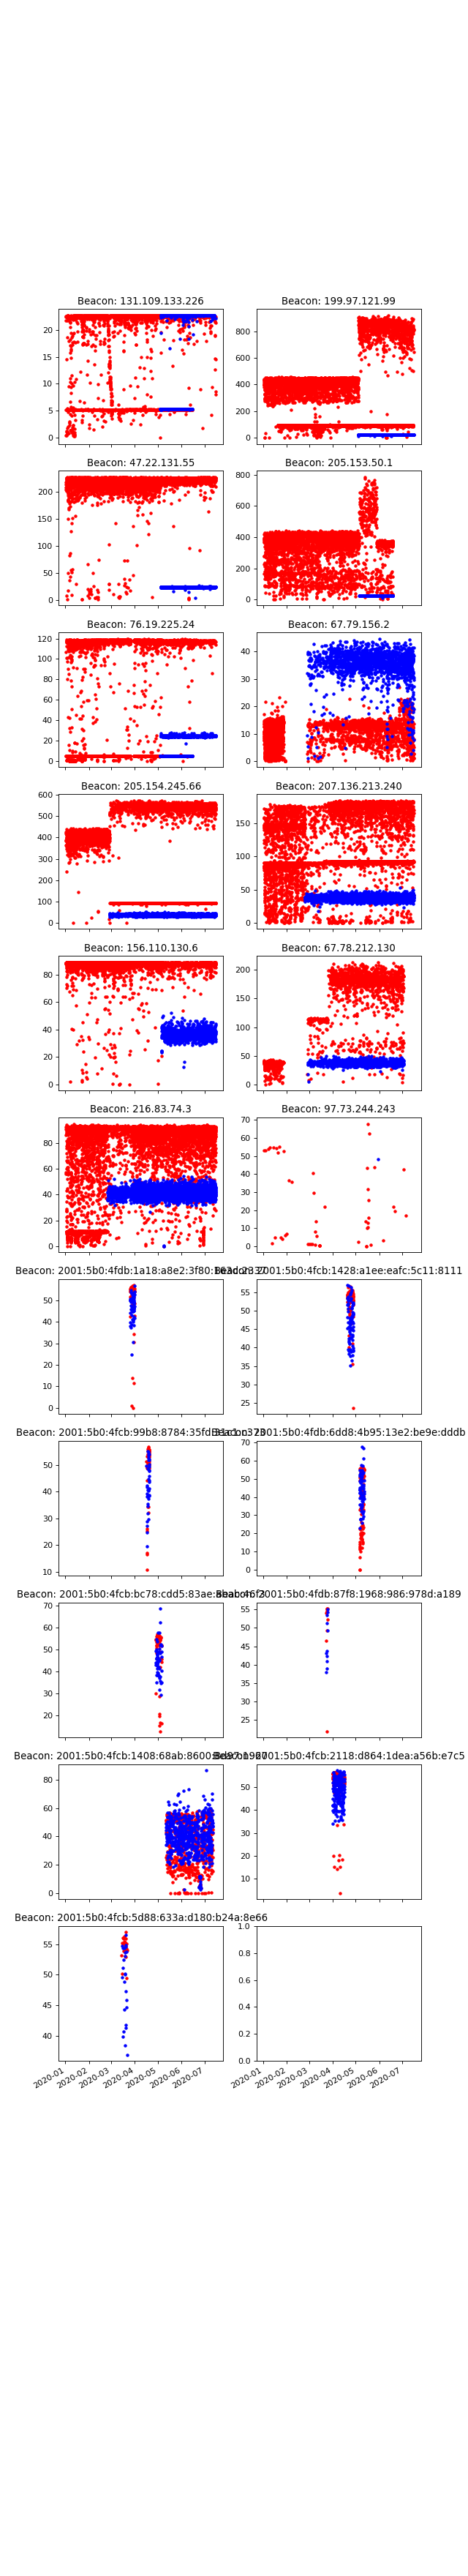

Beacon: 131.109.133.226
Beacon: 199.97.121.99
Beacon: 47.22.131.55
Beacon: 205.153.50.1
Beacon: 76.19.225.24
Beacon: 67.79.156.2
Beacon: 205.154.245.66
Beacon: 207.136.213.240
Beacon: 156.110.130.6
Beacon: 67.78.212.130
Beacon: 216.83.74.3
Beacon: 97.73.244.243
Beacon: 2001:5b0:4fdb:1a18:a8e2:3f80:163d:2337
Beacon: 2001:5b0:4fcb:1428:a1ee:eafc:5c11:8111
Beacon: 2001:5b0:4fcb:99b8:8784:35fd:31c1:c373
Beacon: 2001:5b0:4fdb:6dd8:4b95:13e2:be9e:dddb
Beacon: 2001:5b0:4fcb:bc78:cdd5:83ae:abab:46f3
Beacon: 2001:5b0:4fdb:87f8:1968:986:978d:a189
Beacon: 2001:5b0:4fcb:1408:68ab:8600:8d97:1967
Beacon: 2001:5b0:4fcb:2118:d864:1dea:a56b:e7c5
Beacon: 2001:5b0:4fcb:5d88:633a:d180:b24a:8e66


In [8]:
%matplotlib nbagg
# from matplotlib import interactive
# interactive(True)
# plt.ion()


def plotMultiBeacons(clients, columns=1, width=10, data=None, selector='downloads'):
    if data is None:
        clist = '"'+'", "'.join(clients)+'"'
        data=bq.QueryTimestampTimeseries(query, clientIP=clist, selector=selector)
        global StashData # Skip slow queries when debugging
        StashData = data
    rows = math.ceil(len(clients) / float(columns))
    figLen = (width/float(columns))*rows # assume 2:1 subplots
    print('Size', figLen, width)
    plt.rcParams['figure.figsize'] = [ width, figLen]
    
    fig, axs = plt.subplots(nrows=rows, ncols=columns, squeeze=False, sharex='all')
    for ax, client in zip([i for j in axs for i in j], clients):
        print ('Beacon: '+client)
        ax.set_title('Beacon: '+client)
        cdata = data[data['IP'] == client]
        ax.plot(
            cdata['MeanThroughputMbps'][cdata["_instruments"] == 'tcpinfo'], 'r.',
            cdata['MeanThroughputMbps'][cdata["_instruments"] == 'ndt7'], 'b.')
           
    fig.autofmt_xdate()
    fig.show()
    
    
plotMultiBeacons(clients, 2, data=data, width=8)